## OCR (Optical Character Recognition)

This OCR app will be used to extract text from an image of handwritten notes

Take image (handwritten Notes) --> Process the image(Computer Vision) --> LLM (Role assigned as OCR)

In [4]:
# pip install opencv-python

In [5]:
import cv2
import matplotlib.pyplot as plt
import google.generativeai as genai
from PIL import Image
import os

C:\Users\Dell\AppData\Local\Temp\ipykernel_24408\1975659517.py:3: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  import google.generativeai as genai


In [6]:
image = cv2.imread('Handwritten_notes.png')  # right now it is a BGR image (need to be converted into RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR --> RGB
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # RGB --> greyscale
_,image_bw = cv2.threshold(image_gray,170,255,cv2.THRESH_BINARY)

In [7]:
# Its a color image (3D)

image_gray.shape

(1152, 1308)

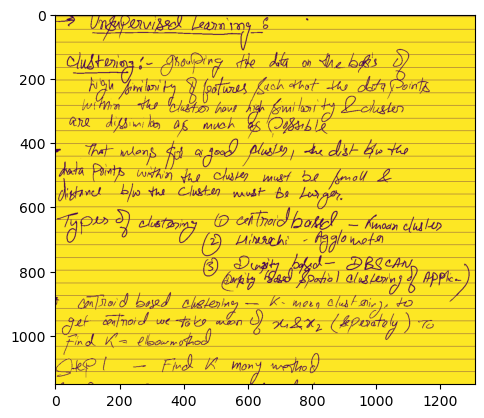

In [9]:
plt.imshow(image_bw)
plt.show()

In [10]:
cv2.imshow('Grey Image', image_gray)
cv2.imshow('Color', image)
cv2.imshow('BW',image_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# The image that cv2 image has given in numpy array format, we need to convert it to object image
final_image = Image.fromarray(image_bw)

In [12]:
# Configure LLM 

gemini_key = os.getenv('GOOGLE_API_KEY1')
genai.configure(api_key=gemini_key)
model = genai.GenerativeModel('gemini-2.5-flash-lite',
                              generation_config={'temperature':0.5})

In [13]:
prompt = ''' 
<ROle> You are an OCR (optical character recoginition) application.
<Goal> Identify the characters in handwritten notes.
<Context> user has provided the image of handwritten notes.
<Instruction> 
* Do not generate any new content.
* You can complete a word which is not recognized.
* output should be well formated.'''

In [14]:
response = model.generate_content([prompt, final_image])
print(response.text)

-> Unsupervised Learning &

- Clustering:- Grouping the data on the basis of
high similarity of features such that the data points
within the cluster have high similarity & clusters
are dissimilar as much as possible

- That means for a good cluster, the dist b/w the
data points within the cluster must be small &
distance b/w the cluster must be larger.

Types of clustering (1) centroid based - k-mean cluster
(2) Hierarchi - Agglometa
(3) Density based - DBSCAN
(Density Based spatial clustering of Applications)

-> centroid based clustering - K-mean clustering, to
get centroid we take mean of x1&x2 (separately) to
find K = elbow method

Step 1 - Find K many method


### Extracting text from word

In [15]:
# pip install python-docx

In [16]:
from docx import Document

In [17]:
file = Document('final draft.docx')

In [18]:
doc_text = ''
for p in file.paragraphs:
    doc_text = doc_text + p.text + '\n'
    
print(doc_text)

A MAJOR PROJECT REPORT
on
Design and Fabrication of Eco-Friendly Bearing Material using Friction Stir Processing
Submitted in partial fulfillment for the award of the degree
of
\BACHELOR OF TECHNOLOGY
in
AUTOMATION & ROBOTICS

Submitted by
Saksham Jha (00719012021)
Rohan Gupta (04519012021)
Shubham Bhardwaj (05119012021)

Under the Guidance of 
Dr. Sumit Chaudhary Assistant Professor
Dr. Sonia Dangi
Assistant Professor

UNIVERSITY SCHOOL OF AUTOMATION AND ROBOTICS GURU GOBIND SINGH INDRAPRASTHA UNIVERSITY EAST DELHI CAMPUS
SURAJMAL VIHAR, DELHI-110032
December 2024

DECLARATION

We, Shubham Bhardwaj (05119012021) , Rohan Gupta (04519012021) and Saksham Jha (00719012021) hereby declare that the major project titled “Design and Fabrication of Eco- Friendly Bearing Material using Friction Stir Processing” submitted to University School of Automation & Robotics, Guru Gobind Singh Indraprastha University, East Delhi Campus, Delhi-32 in partial fulfillment of the requirement for the award of

| File Type   | Extension        | MIME Type                                                                 |
| ----------- | ---------------- | ------------------------------------------------------------------------- |
| Plain text  | `.txt`           | `text/plain`                                                              |
| HTML        | `.html`          | `text/html`                                                               |
| CSV         | `.csv`           | `text/csv`                                                                |
| JSON        | `.json`          | `application/json`                                                        |
| PDF         | `.pdf`           | `application/pdf`                                                         |
| ZIP         | `.zip`           | `application/zip`                                                         |
| JPEG image  | `.jpg` / `.jpeg` | `image/jpeg`                                                              |
| PNG image   | `.png`           | `image/png`                                                               |
| GIF         | `.gif`           | `image/gif`                                                               |
| MP3 audio   | `.mp3`           | `audio/mpeg`                                                              |
| MP4 video   | `.mp4`           | `video/mp4`                                                               |
| Excel       | `.xls`           | `application/vnd.ms-excel`                                                |
| Excel (new) | `.xlsx`          | `application/vnd.openxmlformats-officedocument.spreadsheetml.sheet`       |
| Word        | `.doc`           | `application/msword`                                                      |
| Word (new)  | `.docx`          | `application/vnd.openxmlformats-officedocument.wordprocessingml.document` |